Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
fi = poly.fit_transform(X)
print(fi)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg
#print(fi)
#print(transpose(fi))
w1 = dot( dot( inv( dot(transpose(fi),fi) ), transpose(fi)), y)
w2 = dot( pinv(fi), y)
#print(w1)
#print(w2)

Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [6]:
from sklearn.metrics import mean_squared_error
hx = array(dot(w1, fi.transpose()))
print(hx)
E1 = 0
for i in range(len(hx)):
    E1 += (y[i]-hx[i])**2
E1 /= 2
print(E1)
E2 = mean_squared_error(y, hx)
print(E2)

[2.2        2.65714286 3.11428571 4.02857143]
4.085714285714286
2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [13]:
#w3 = dot(inv(fi), y)
poly1 = PolynomialFeatures(1)
fi1 = poly1.fit_transform(X)
#w3 = dot( inv(fi1), y)
w4 = dot( pinv(fi1), y)
#print(w3)
print(w4)

[2.2        0.45714286]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(fi, y)
print(reg.score(fi, y))
print(reg.coef_)
print(reg.intercept_)
predictions = reg.predict(fi)
error = mean_squared_error(y, predictions)
print(error)

0.18285714285714272
[0.         0.45714286]
2.2
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [10]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    y = []
    for i in range(len(X)):
        y.append(f(X[i]) + normal(0, noise))
    return array(y)

In [11]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [12]:
def f(x): 
    return (5+x-2*pow(x, 2)-5*pow(x, 3))

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)
print(y)

[[ 782.97231934]
 [ 352.38416625]
 [ 496.98121803]
 [ 532.63850528]
 [ 521.552867  ]
 [ 238.48006186]
 [-215.25720892]
 [ 272.46963984]
 [ 442.27797908]
 [-270.73317965]
 [-162.60247583]
 [  77.48386422]
 [ 285.67667377]
 [ -50.57415038]
 [ 107.6287168 ]
 [ -24.92343784]
 [-116.76421529]
 [ 272.40006229]
 [ 260.92760235]
 [ 162.19046749]
 [ 133.71183777]
 [  60.4899644 ]
 [-109.88538292]
 [-259.18574829]
 [ 182.13570417]
 [ -27.84564303]
 [-236.0549703 ]
 [ 201.24015729]
 [  13.95607571]
 [ -57.006632  ]
 [-233.79901249]
 [ -62.2761327 ]
 [ 344.20097193]
 [   1.24640346]
 [-375.53548648]
 [  27.24288421]
 [ 309.62367771]
 [ -79.81431621]
 [-194.86108943]
 [-271.40458707]
 [-148.79889508]
 [-268.69720524]
 [  23.33902111]
 [-151.75977533]
 [-420.20445011]
 [-288.86650081]
 [-336.6927506 ]
 [-610.18253587]
 [-419.89103904]
 [-740.15910444]]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

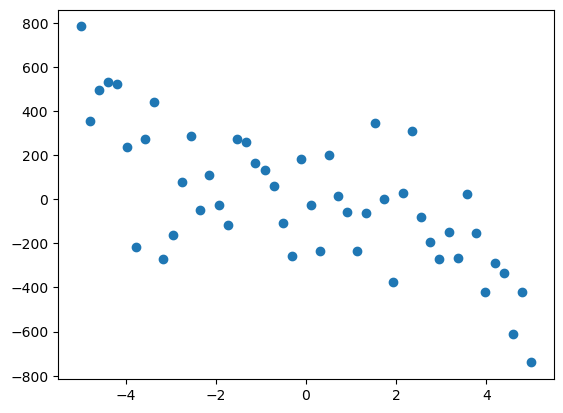

In [13]:
scatter(x, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

35040.4706904952


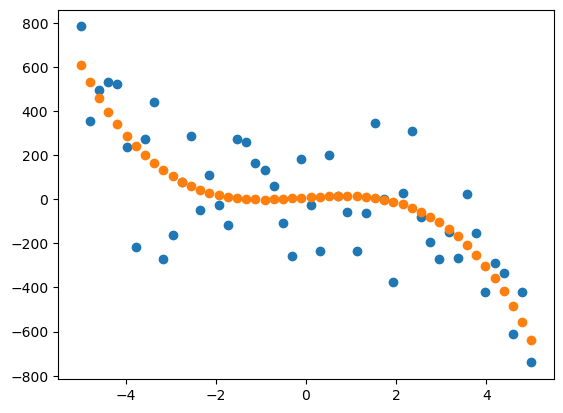

In [14]:
poly_2b = PolynomialFeatures(3)
fi_2b = poly_2b.fit_transform(x)

model = LinearRegression()
model.fit(fi_2b, y)
predictions_2b = model.predict(fi_2b)
error_2b = mean_squared_error(y, predictions_2b)
print(error_2b)

a = scatter(x, y)
b = scatter(x, predictions_2b)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

[47218.5687011173, 35040.4706904952, 33554.37863337306, 31446.87623284861, 26662.07727975042]


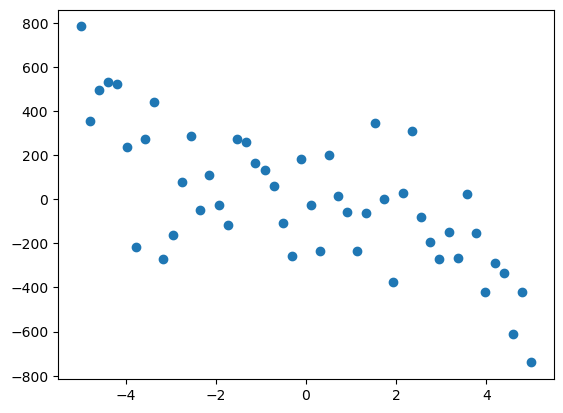

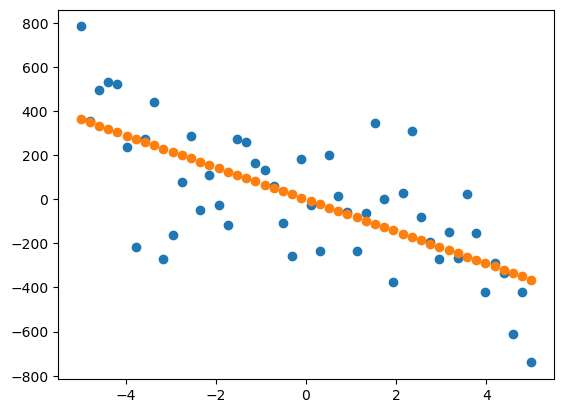

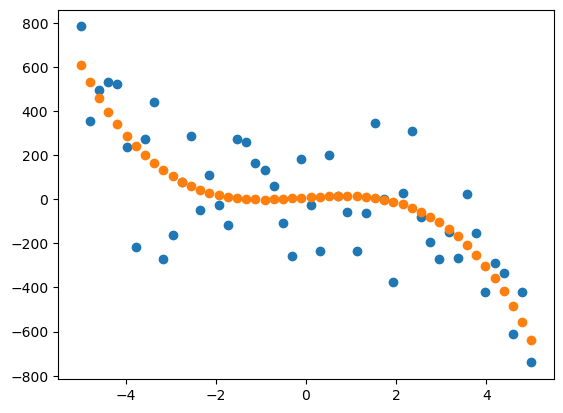

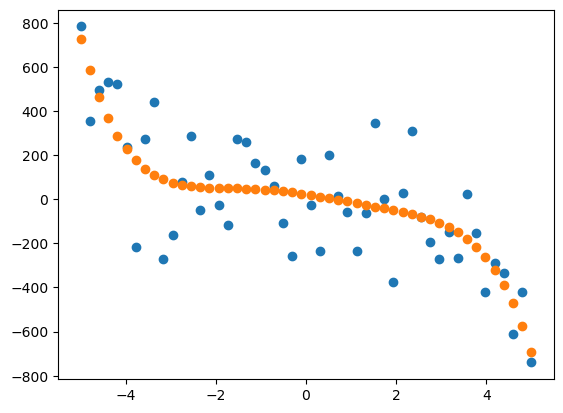

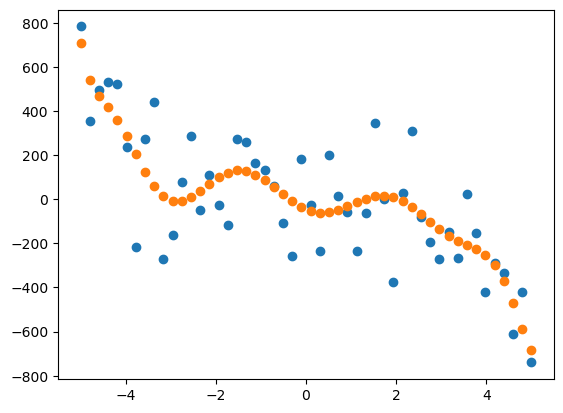

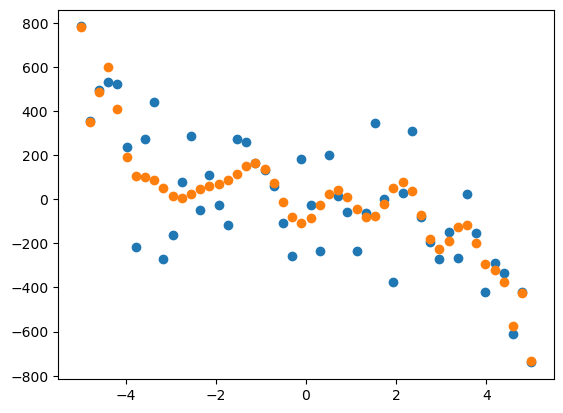

In [21]:
polinoms = [1,3,5,10,20]
errors = []
predictions3 = []
scatter(x, y)
for polinom in polinoms:
    degree = PolynomialFeatures(polinom)
    fi3 = degree.fit_transform(x)
    model = LinearRegression()
    model.fit(fi3, y)
    temp = model.predict(fi3)
    predictions3.append(temp)
    errors.append(mean_squared_error(y, temp))
print(errors)
for prediction in predictions3:
    figure()
    scatter(x, y)
    scatter(x, prediction)

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

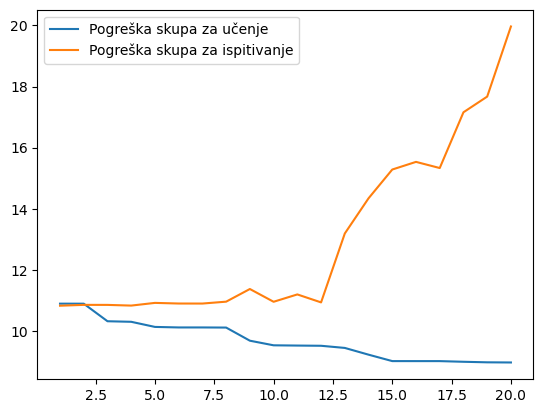

In [106]:
from sklearn.model_selection import train_test_split

degrees = arange(1,21,1)
#print(degrees)
train_errors = []
test_errors = []

for degree in degrees:
    poly_3b = PolynomialFeatures(degree)
    fi_3b = poly_3b.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(fi_3b, y, test_size=0.5, train_size=0.5, random_state = 42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    train_error = log(mean_squared_error(y_train, train_predictions))
    test_error = log(mean_squared_error(y_test, test_predictions))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plot(degrees, train_errors, label="Pogreška skupa za učenje")
plot(degrees, test_errors, label="Pogreška skupa za ispitivanje")
legend()
show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

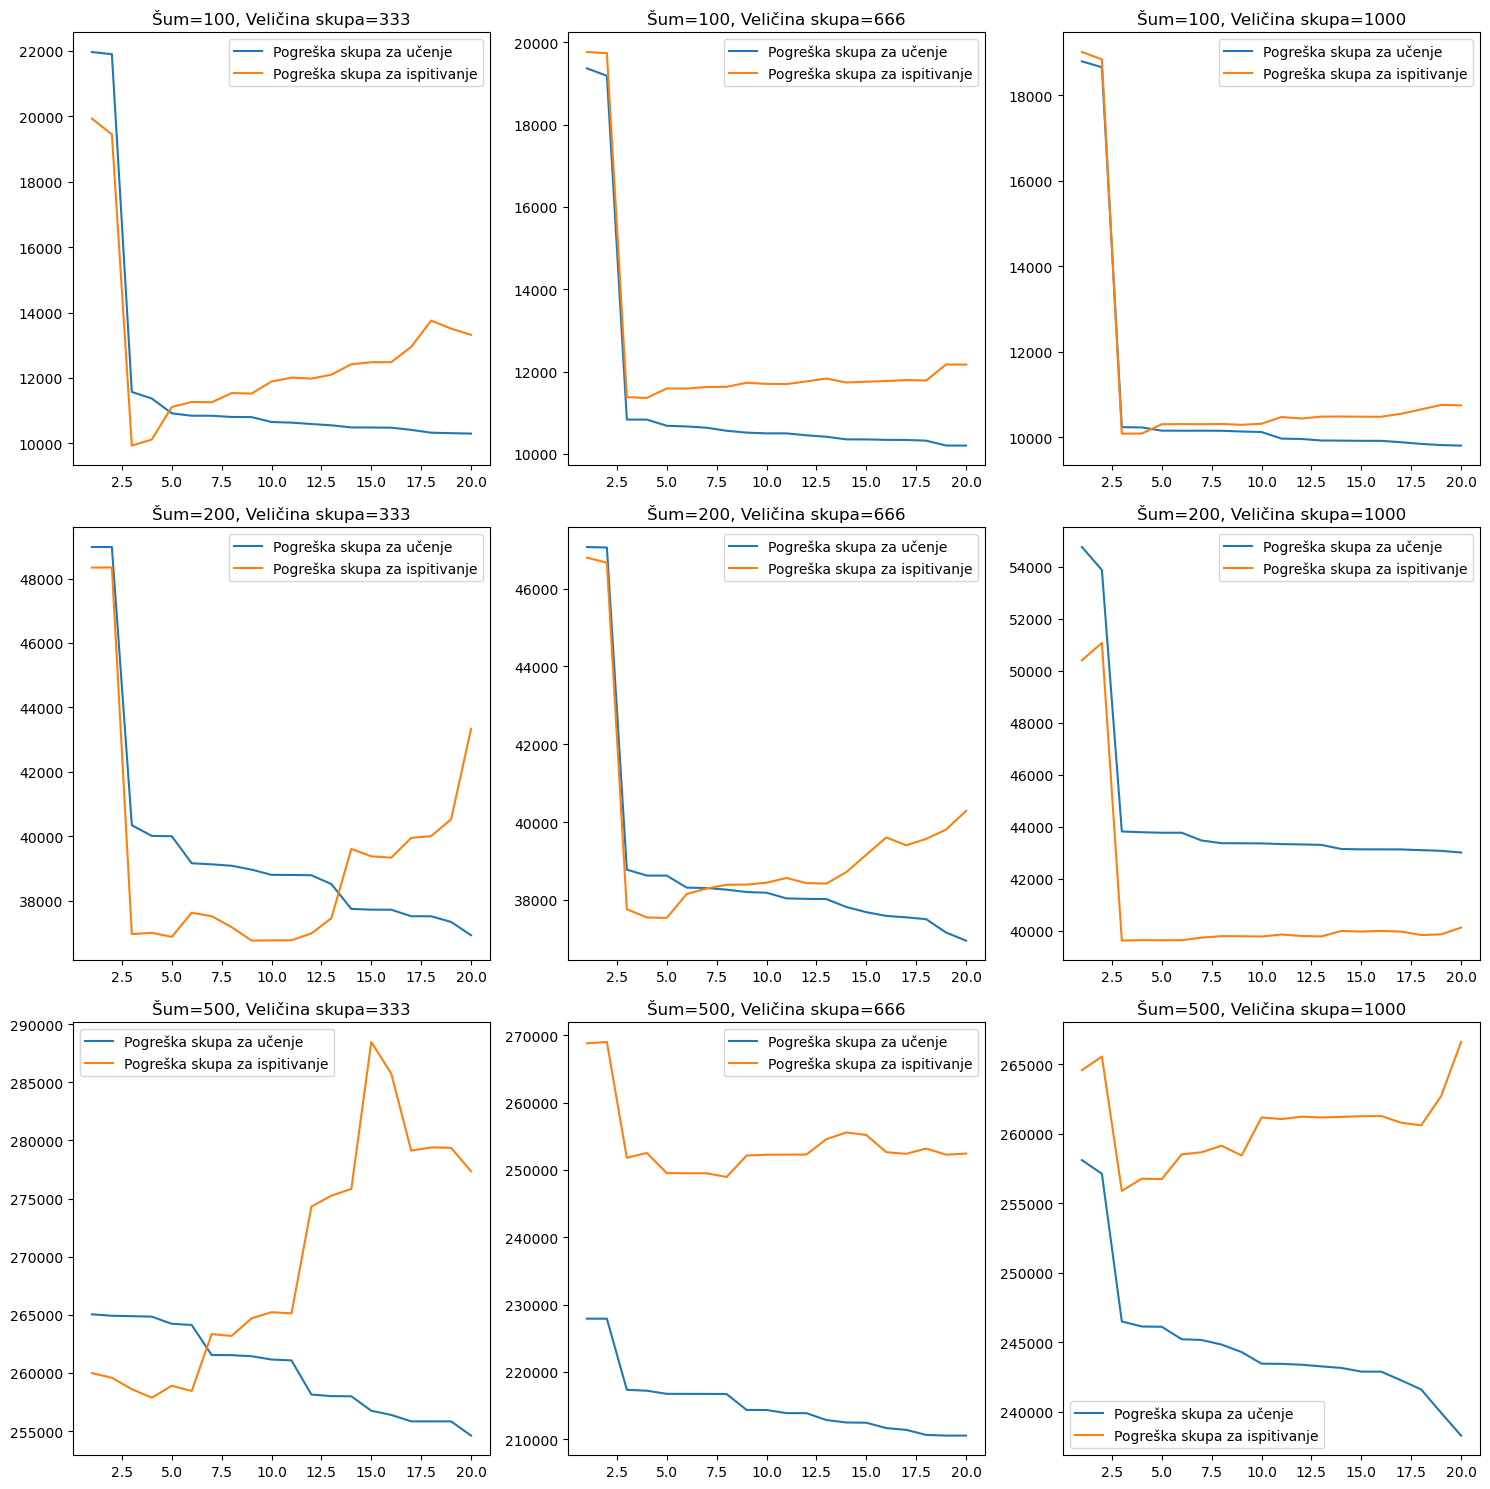

In [57]:
noises = [100, 200, 500]
sample_sizes = [333, 666, 1000]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i in range(len(noises)):
    for j in range(len(sample_sizes)):
        x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = int(sample_sizes[j]/2), test_size=int(sample_sizes[j]/2), random_state=42)
        y_train_noisy = make_labels(x_train, f, noises[i])
        y_test_noisy = make_labels(x_test, f, noises[i])
        train_errors = []
        test_errors = []
        for degree in degrees:
            poly = PolynomialFeatures(degree)
            x_train_poly = poly.fit_transform(x_train)
            x_test_poly = poly.transform(x_test)
            model = LinearRegression()
            model.fit(x_train_poly, y_train_noisy)
            train_predictions = model.predict(x_train_poly)
            test_predictions = model.predict(x_test_poly)
            train_error = log(mean_squared_error(y_train_noisy, train_predictions))
            test_error = log(mean_squared_error(y_test_noisy, test_predictions))
            train_errors.append(train_error)
            test_errors.append(test_error)
        
        axes[i, j].plot(degrees, train_errors, label="Pogreška skupa za učenje")
        axes[i, j].plot(degrees, test_errors, label="Pogreška skupa za ispitivanje")
        axes[i, j].set_title(f"Šum={noises[i]}, Veličina skupa={sample_sizes[j]}")
        axes[i, j].legend()

plt.tight_layout()
plt.show()


***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [63]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)
fi = poly.fit_transform(X)
lambdas = [0, 1, 10]

for i in range(len(lambdas)):
    temp = dot(transpose(fi),fi)
    w = dot( dot( inv( temp + dot(lambdas[i], eye(len(temp))) ), transpose(fi)), y)
    print(f"Lambda: {lamb[i]}, tezine: {w}")

Lambda: 0, tezine: [ 4.         -5.91666667  3.375      -0.45833333]
Lambda: 1, tezine: [ 1.79567372 -0.24729075 -0.0175289   0.07014758]
Lambda: 10, tezine: [0.43312265 0.11060671 0.13827839 0.03093411]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [65]:
from sklearn.linear_model import Ridge

for lamb in lambdas:
    ridge = Ridge(alpha = lamb)
    ridge.fit(fi, y)
    print(f"Lambda: {lamb}, coef: {ridge.coef_}, intercept: {ridge.intercept_} ")

Lambda: 0, coef: [ 0.         -5.91666667  3.375      -0.45833333], intercept: 3.999999999999943 
Lambda: 1, coef: [ 0.         -0.69079365 -0.2831746   0.1445805 ], intercept: 3.0569614512471643 
Lambda: 10, coef: [ 0.         -0.15897295 -0.13423067  0.0815601 ], intercept: 2.4944418431229733 


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

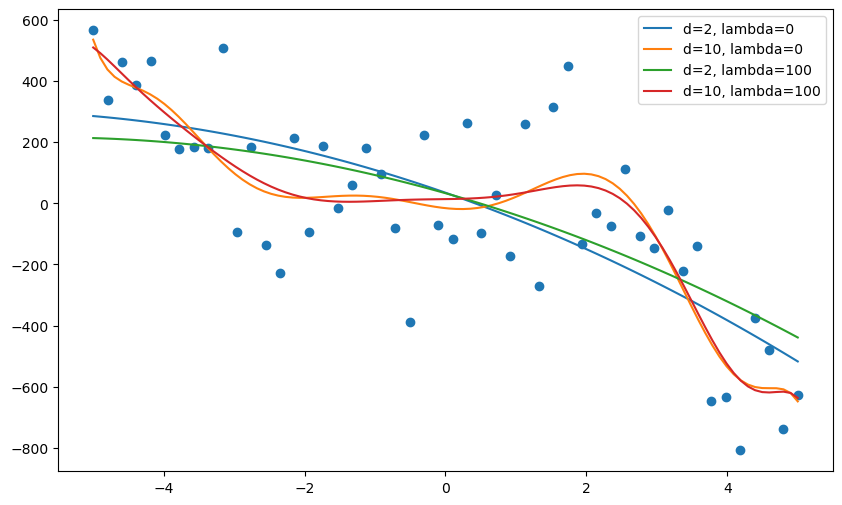

In [94]:
x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)
lambdas = [0, 100]
degrees = [2, 10]
figure(figsize=(10, 6))

for lamb in lambdas:
    for degree in degrees:
        poly = PolynomialFeatures(degree)
        fi = poly.fit_transform(x)
        ridge = Ridge(alpha = lamb)
        ridge.fit(fi, y)
        
        x_range = linspace(-5, 5, 100)
        fi_range = poly.transform(x_range.reshape(-1, 1))
        predictions = ridge.predict(fi_range)
        
        plot(x_range, predictions, label=f'd={degree}, lambda={lamb}')

scatter(x, y)
legend()
show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


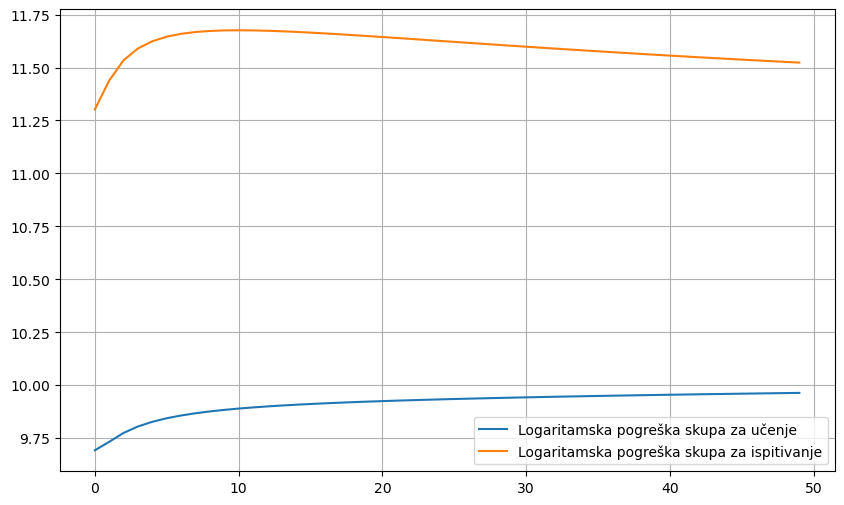

In [97]:
x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

lambdas = arange(0, 50, 1)
degree = 10

train_errors = []
test_errors = []

poly = PolynomialFeatures(degree)
fi = poly.fit_transform(x)

for lamb in lambdas: 
    x_train, x_test, y_train, y_test = train_test_split(fi, y, test_size=0.5, random_state=42)
    ridge = Ridge(alpha=lamb)
    ridge.fit(x_train, y_train)
    
    train_predictions = ridge.predict(x_train)
    test_predictions = ridge.predict(x_test)
    
    train_error = log(mean_squared_error(y_train, train_predictions))
    test_error = log(mean_squared_error(y_test, test_predictions))
    train_errors.append(train_error)
    test_errors.append(test_error)

figure(figsize=(10, 6))
plot(lambdas, train_errors, label="Logaritamska pogreška skupa za učenje")
plot(lambdas, test_errors, label="Logaritamska pogreška skupa za ispitivanje")
legend()
grid()
show()


### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [98]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

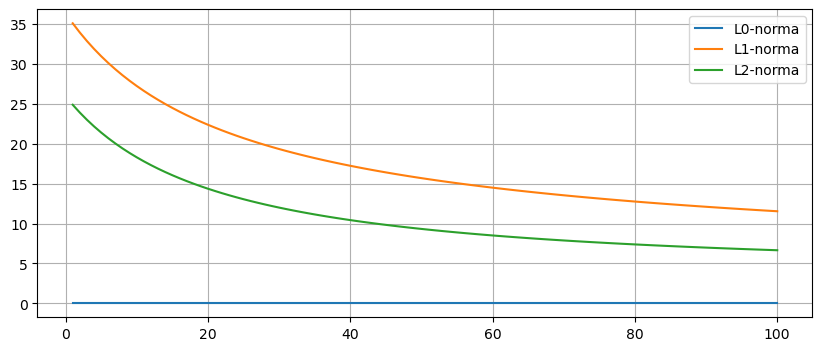

In [108]:
from sklearn.linear_model import Ridge

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

degree = 5
lambdas = arange(1, 101, 1)

l0_norms = []
l1_norms = []
l2_norms = []

for lamb in lambdas:
    poly = PolynomialFeatures(degree)
    fi = poly.fit_transform(x)
    ridge = Ridge(alpha=lamb)
    ridge.fit(fi, y)
    
    w = ridge.coef_
    l0_norms.append(nonzeroes(w))
    l1_norms.append(sum(abs(w)))
    l2_norms.append(sqrt(sum(w ** 2)))
    
figure(figsize=(10, 4))
plot(lambdas, l0_norms, label="L0-norma")
plot(lambdas, l1_norms, label="L1-norma")
plot(lambdas, l2_norms, label="L2-norma")
legend()
grid()
show()


### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

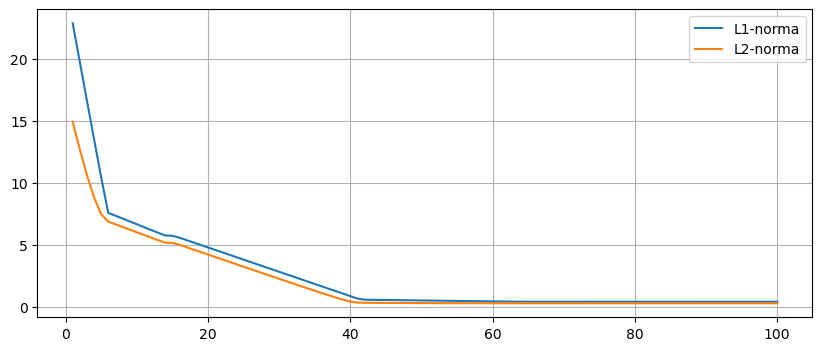

In [110]:
from sklearn.linear_model import Lasso

x = make_instances(-5, 5, 50)
y = make_labels(x, f, 200)

degree = 5
lambdas = arange(1, 101, 1)

l1_norms = []
l2_norms = []

for lamb in lambdas:
    poly = PolynomialFeatures(degree)
    fi = poly.fit_transform(x)
    ridge = Lasso(alpha=lamb)
    ridge.fit(fi, y)
    
    w = ridge.coef_
    l1_norms.append(sum(abs(w)))
    l2_norms.append(sqrt(sum(w ** 2)))
    
figure(figsize=(10, 4))
plot(lambdas, l1_norms, label="L1-norma")
plot(lambdas, l2_norms, label="L2-norma")
legend()
grid()
show()


### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [124]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

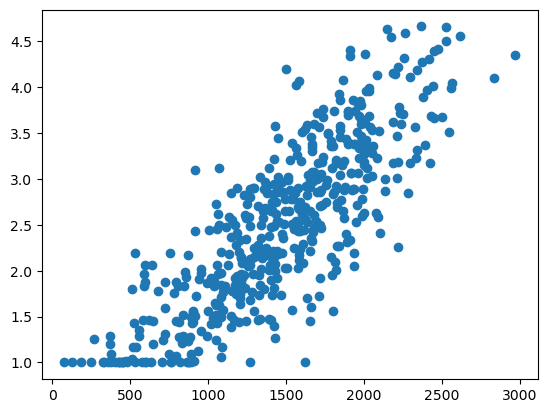

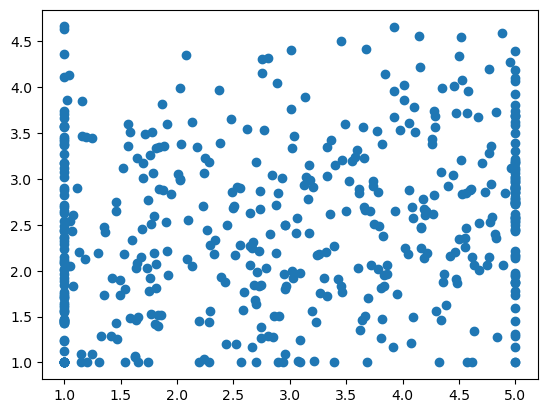

In [125]:
figure()
scatter(exam_score, grades_y)
figure()
scatter(grade_in_highschool, grades_y)

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [136]:
lamb = 0.01
ridge = Ridge(alpha = lamb)
ridge.fit(grades_X, grades_y)
print(ridge.coef_)

[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [137]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()

grades_X_fixed = scaler1.fit_transform(grades_X)
grades_y_fixed = scaler2.fit_transform(grades_y.reshape(-1,1))

ridge = Ridge(alpha = lamb)
ridge.fit(grades_X_fixed, grades_y_fixed)
print(ridge.coef_)

[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [134]:
zadnji = grades_X_fixed[:, -1]
grades_X_fixed_colinear = column_stack((grades_X_fixed, zadnji))
#print(grades_X_fixed_colinear)

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [138]:
ridge = Ridge(alpha = lamb)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)
print(ridge.coef_)

[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [146]:
lamb1 = 0.01
lamb2 = 1000
w1 = []
w2 = []
for i in range(10):
    random = randint(1,100)
    train_x, test_x, train_y, test_y = train_test_split(grades_X_fixed_colinear, grades_y_fixed, train_size = 0.5, test_size=0.5, random_state=random)
    
    ridge1 = Ridge(lamb1)
    ridge2 = Ridge(lamb2)
    
    ridge1.fit(train_x, train_y)
    ridge2.fit(train_x, train_y)
    
    coef1 = ridge1.coef_
    coef2 = ridge2.coef_
    
    w1.append(coef1)
    w2.append(coef2)
    
print(f"Standardna devijacija tezina za lambda = 0.01 je: {std(array(w1), axis = 0)}")
print(f"Standardna devijacija tezina za lambda = 1000 je: {std(array(w2), axis = 0)}")

Standardna devijacija tezina za lambda = 0.01 je: [[0.011143   0.01535797 0.01535797]]
Standardna devijacija tezina za lambda = 1000 je: [[0.0054168  0.00469954 0.00469954]]


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.